<a href="https://colab.research.google.com/github/gabrielluiz97/FertilityDataSet/blob/master/Copy_of_Fertility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
99/99 [==============================] - 0s 3ms/step - loss: 0.7639 - accuracy: 0.1818
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6970
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.8788
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8788
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8788
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8788
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8788
Epoch 8/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8788
Epoch 9/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8788
Epoch 10/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8788
Epoch 11/

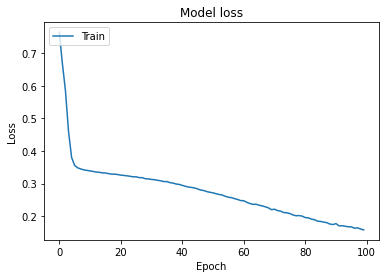

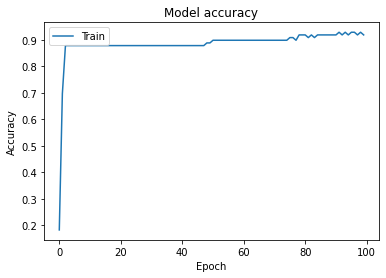

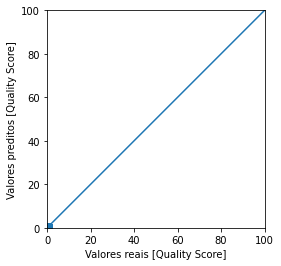

In [6]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils import model_to_dot

def main():
      fertilityDiagnosisCSV = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt", sep=',')
      datasetFertility = fertilityDiagnosisCSV.values
      
      for j in range(len(datasetFertility)):
          if datasetFertility[j][9] == "N":
            datasetFertility[j][9] = 1 
          elif datasetFertility[j][9] == "O":
            datasetFertility[j][9] = 0 
      #define o range de coluna dos atributos de entrada
      X = datasetFertility[:,0:9]
      #define a coluna de saída
      y = datasetFertility[:,9]


      model = Sequential()
      #perceptron possui 3 camadas(1-entrada, 2-camda oculta, 3- saída)      
      #no primeiro parâmetro é definida a quantidade de neurônios da camada
      #no segundo parâmetro Activation= define a função de ativação que será utilizada que no caso foi a 'Relu' e 'sigmoid'
      #A camada de saída por fim possui apenas 1 neurônio
      model.add(Dense(12, activation='relu', input_shape=(9,)))
      model.add(Dense(8, activation='relu'))
      model.add(Dense(1, activation='sigmoid'))

      # Utilizamos o método compile para configurar o processo de aprendizagem.
      #A compilação do modelo escolhe o melhor caminho para representar a rede e fazer as predições.
      # Os parâmetros utilizados:
      # O primeiro parâmetro "loss", define a função que calculará a diferença entre os dados de teste e os dados de validação (utilizamos a 'binary_crossentropy', que representa uma função de perda logarítimica ).
      # O segundo parâmetro "optimizer" define a função responsável por dizer como os pesos da rede neural são atualizados(Utilizamos o Adam, um algorítimo gradiente de descida).
      # O terceiro parâmetro "metrics" define uma lista de métricas a serem utilizadas para avaliação. (utilizamos a accuracy).
      # Todos os parâmetros estão listados na documentação do Keras, selecionamos alguns dos mais comumente utilizados.
      model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

      # Metodo Fit é utilizado para treinar o modelo para um determinado número de iterações (epochs), definindo o tamanho do lote de amostras que será propagado pelas camadas (batch_size).
      # Nesse caso, utilizamos toda a base para o treinamento, passando os dados (X) e os resultados esperados (y), em formato de matriz numpy.
      history = model.fit(X, y ,epochs=100, batch_size=1, verbose=1)

      plt.plot(history.history['loss'])
      plt.title('Model loss')
      plt.ylabel('Loss')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()

      plt.plot(history.history['accuracy'])
      plt.title('Model accuracy')
      plt.ylabel('Accuracy')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()

      #Função predict_classes gera classes de predição para cada conjunto de amostra(batch).
      #predictions = model.predict_classes(X)
      predictions = model.predict(X).flatten()
      a = plt.axes(aspect='equal')
      plt.scatter(y, predictions)
      plt.xlabel('Valores reais [Quality Score]')
      plt.ylabel('Valores preditos [Quality Score]')
      lims = [0, 100]
      plt.xlim(lims)
      plt.ylim(lims)
      _ = plt.plot(lims, lims)

if __name__== "__main__":
  main()


In [1]:
!pip install git+https://github.com/tensorflow/docs


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-eoue02vc
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-eoue02vc
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=82295 sha256=4402df18f29a2892567fd8f0f20f0df847b847dfc41341cb363641d092ec4c5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-yt9bm041/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [2]:
!pip uninstall tensorflow==2.0
!pip install tensorflow==1.14

Uninstalling tensorflow-2.2.0rc3:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc3
     |████████████████████████████████| 109.2MB 85kB/s 
     |████████████████████████████████| 3.2MB 44.6MB/s 
     |████████████████████████████████| 491kB 42.7MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
